# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

In [1]:
# initial Pyspark session
print("Welcome to my EMR Notebook!")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1585010202573_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Welcome to my EMR Notebook!

In [2]:
# check pyspark session 
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1585010202573_0001,pyspark,idle,Link,Link,
1,application_1585010202573_0002,pyspark,idle,Link,Link,✔


In [3]:
# list pyspark packages
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.2  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        20.0.2 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 46.1.1 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.34.2 
windmill                   1.6

In [4]:
# install common libraries
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

In [5]:
# install common libraries
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.6-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl (90 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [6]:
# install common libraries
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [7]:
# import libraries
# Pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
# CommonLibraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Pyspark ML Library
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression, GBTClassifier, LinearSVC
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
# create a Spark session
spark = SparkSession \
    .builder \
    .appName('Sparkify') \
    .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [9]:
# read 12GB Sparkify data
event_data = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
df = spark.read.json(event_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# show data information
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('artist', 'string'), ('auth', 'string'), ('firstName', 'string'), ('gender', 'string'), ('itemInSession', 'bigint'), ('lastName', 'string'), ('length', 'double'), ('level', 'string'), ('location', 'string'), ('method', 'string'), ('page', 'string'), ('registration', 'bigint'), ('sessionId', 'bigint'), ('song', 'string'), ('status', 'bigint'), ('ts', 'bigint'), ('userAgent', 'string'), ('userId', 'string')]

In [10]:
# measure the shape of dataset
(df.count(), len(df.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(26259199, 18)

In [28]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['artist', 'auth', 'firstName', 'gender', 'itemInSession', 'lastName', 'length', 'level', 'location', 'method', 'page', 'registration', 'sessionId', 'song', 'status', 'ts', 'userAgent', 'userId']

In [11]:
# it seems artist,length,song have 20850272
# firstName, lastName, gender, location, registration,userAgent have 25480720
# auth has 26259199
df.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+----------+---------+--------+------------------+--------+------------------+--------+--------------+--------+--------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+
|summary|            artist|      auth|firstName|  gender|     itemInSession|lastName|            length|   level|      location|  method|    page|        registration|         sessionId|                song|            status|                  ts|           userAgent|            userId|
+-------+------------------+----------+---------+--------+------------------+--------+------------------+--------+--------------+--------+--------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+
|  count|          20850272|  26259199| 25480720|25480720|          26259199|25480720|          20850272|26259199|      25480720|2625

In [17]:
# look at userId and sessionId
# no empty input found 
df.createOrReplaceTempView('sparkify')
spark.sql(
    '''
    SELECT DISTINCT userId
    FROM sparkify
    ORDER BY userId
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+
| userId|
+-------+
|1000025|
|1000035|
|1000083|
|1000103|
|1000164|
|1000168|
|1000182|
|1000194|
|1000214|
|1000233|
|1000244|
|1000248|
|1000280|
|1000353|
|1000407|
|1000409|
|1000446|
|1000503|
|1000527|
|1000611|
+-------+
only showing top 20 rows

In [10]:
df.createOrReplaceTempView('sparkify')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# no blank for session id
spark.sql(
    '''
    SELECT DISTINCT sessionId
    FROM sparkify
    ORDER BY sessionId
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|sessionId|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
|        7|
|        9|
|       10|
|       11|
|       12|
|       13|
|       15|
|       16|
|       17|
|       18|
|       19|
|       20|
|       21|
|       22|
+---------+
only showing top 20 rows

In [18]:
# It seems no empty string for userid & session id
# remove empty userid & session id
df.createOrReplaceTempView('sparkify')
clean_sql = spark.sql(
    '''
    SELECT *
    FROM sparkify
    WHERE userId != '' and sessionId IS NOT null
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# the result shows it doesn't work.
clean_sql.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+---------+------+-------------+---------+----------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|              artist|      auth|firstName|gender|itemInSession| lastName|    length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent| userId|
+--------------------+----------+---------+------+-------------+---------+----------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|           Popol Vuh| Logged In|    Shlok|     M|          278|  Johnson| 524.32934| paid|Dallas-Fort Worth...|   PUT|NextSong|1533734541000|    22683|Ich mache einen S...|   200|1538352001000|"Mozilla/5.0 (Win...|1749042|
|         Los Bunkers| Logged In|  Vianney|     F|            9|   Miller| 238.39302| paid|San Francisco

In [12]:
# we verified some missing records are non-users
# records with no songs means idle log-in time
clean_sql.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+----------+---------+--------+------------------+--------+------------------+--------+--------------+--------+--------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|  gender|     itemInSession|lastName|            length|   level|      location|  method|    page|        registration|         sessionId|                song|            status|                  ts|           userAgent|            userId|
+-------+-----------------+----------+---------+--------+------------------+--------+------------------+--------+--------------+--------+--------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+
|  count|         20850272|  26259199| 25480720|25480720|          26259199|25480720|          20850272|26259199|      25480720|26259199

In [20]:
# We try to find the null records, and we notice the distribution of gender
# we decide to look at the null
spark.sql(
    '''
    SELECT DISTINCT gender
    FROM clean_sql
    ORDER BY gender
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|gender|
+------+
|  null|
|     F|
|     M|
+------+

In [21]:
# it shows 778479 nulls, making gender hard to be filled and used.
group_gender = spark.sql(
    '''
    SELECT gender, count(*) as count
    FROM clean_sql
    GROUP BY gender
    ORDER BY count(*) desc
    '''
).toPandas()

group_gender

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  gender     count
0      M  13299562
1      F  12181158
2   None    778479

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

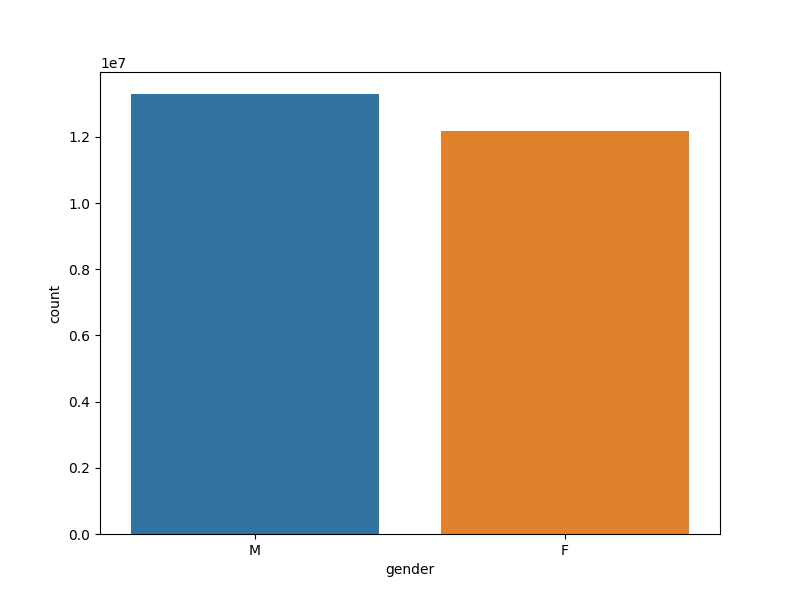

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='count', data=group_gender)
plt.show()
%matplot plt

In [23]:
# for gender, we'd better look at unique users
# interesting to find only one null users, it may belongs to guests, but user churn is not related to guests.
group_gender = spark.sql(
    '''
    SELECT gender, count(DISTINCT userId) as count
    FROM clean_sql
    GROUP BY gender
    ORDER BY count(*) desc
    '''
).toPandas()

group_gender

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  gender  count
0      M  11651
1      F  10626
2   None      1

In [14]:
# find out the null user and remove it.
clean_sql = spark.sql(
    '''
    SELECT *
    FROM sparkify
    WHERE gender IS NOT null
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
# we can see only music is left blank.
clean_sql.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+---------+---------+--------+------------------+--------+-----------------+--------+--------------+--------+--------+--------------------+-----------------+--------------------+------------------+--------------------+--------------------+-----------------+
|summary|            artist|     auth|firstName|  gender|     itemInSession|lastName|           length|   level|      location|  method|    page|        registration|        sessionId|                song|            status|                  ts|           userAgent|           userId|
+-------+------------------+---------+---------+--------+------------------+--------+-----------------+--------+--------------+--------+--------+--------------------+-----------------+--------------------+------------------+--------------------+--------------------+-----------------+
|  count|          20850272| 25480720| 25480720|25480720|          25480720|25480720|         20850272|25480720|      25480720|25480720|25480720|

In [15]:
# store the clean data
clean_sql.createOrReplaceTempView('clean_sql')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

### Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

In [12]:
# look at columns
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['artist', 'auth', 'firstName', 'gender', 'itemInSession', 'lastName', 'length', 'level', 'location', 'method', 'page', 'registration', 'sessionId', 'song', 'status', 'ts', 'userAgent', 'userId']

In [16]:
# Artist
clean_sql.createOrReplaceTempView('clean_sql')
spark.sql(
    '''
    SELECT DISTINCT artist
    FROM clean_sql
    ORDER BY artist
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|              artist|
+--------------------+
|                null|
|                 !!!|
|            !Deladap|
|        & And Oceans|
|        '68 Comeback|
|'N Sync/Phil Collins|
|        'Til Tuesday|
| 't Hof Van Commerce|
|'t Hof Van Commer...|
|  (Hed) Planet Earth|
|       (Love) Tattoo|
|   (Native Passions)|
|(We Are) Performance|
|          (hed) p.e.|
|*NSYNC featuring ...|
|              *Shels|
|  + / - {Plus/Minus}|
|                + 44|
|                 +44|
|          -123 minut|
+--------------------+
only showing top 20 rows

In [18]:
group_artist = spark.sql(
    '''
    SELECT artist, count(*) as count
    FROM clean_sql
    WHERE artist IS NOT null
    GROUP BY artist
    ORDER BY count(*) desc
    LIMIT 10
    '''
).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

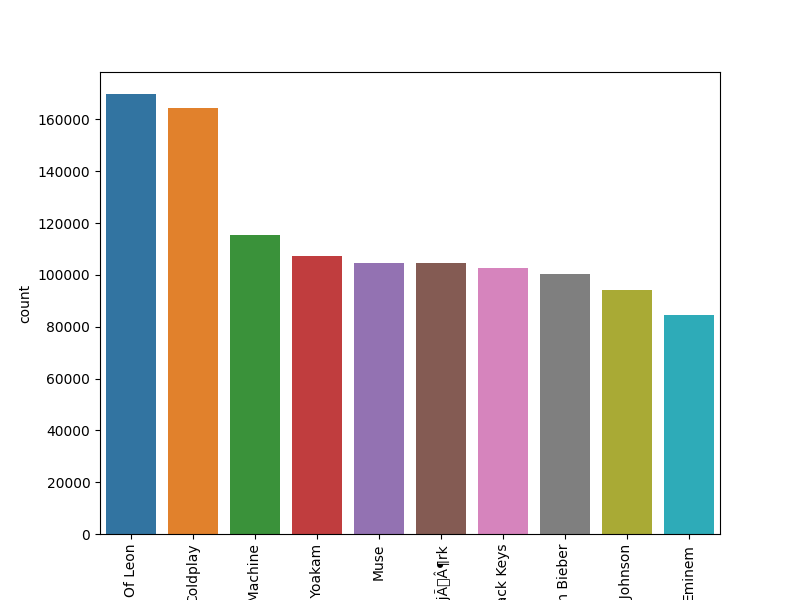

In [19]:
# plot out visualization of target features
plt.figure(figsize=(8,6))
sns.barplot(x='artist', y='count', data=group_artist)
plt.xticks(rotation=90)
%matplot plt

In [20]:
# Auth
spark.sql(
    '''
    SELECT DISTINCT auth
    FROM clean_sql
    ORDER BY auth
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|     auth|
+---------+
|Cancelled|
|Logged In|
+---------+

In [21]:
# group up feature count information
group_auth = spark.sql(
    '''
    SELECT auth, count(*) as count
    FROM clean_sql
    GROUP BY auth
    ORDER BY count(*) desc
    '''
).toPandas()

group_auth

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        auth     count
0  Logged In  25475717
1  Cancelled      5003

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

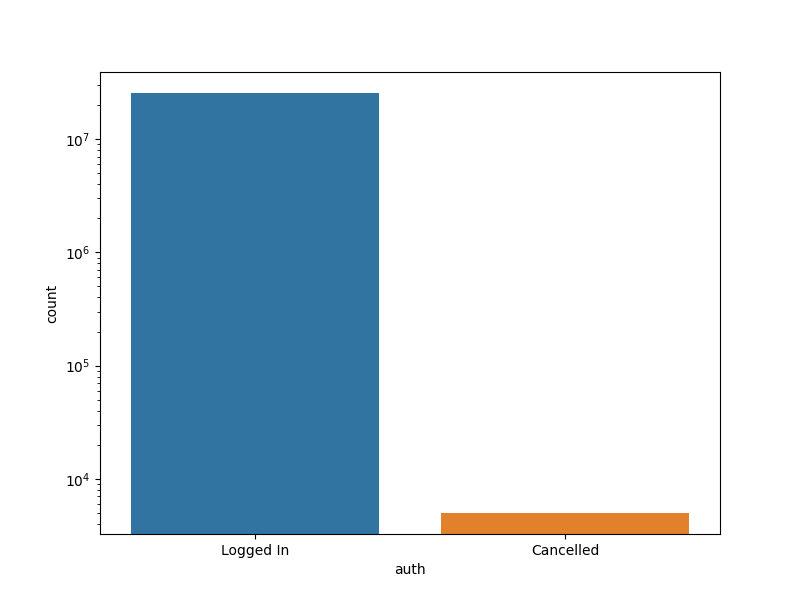

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='auth', y='count', data=group_auth)
plt.yscale('log')
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

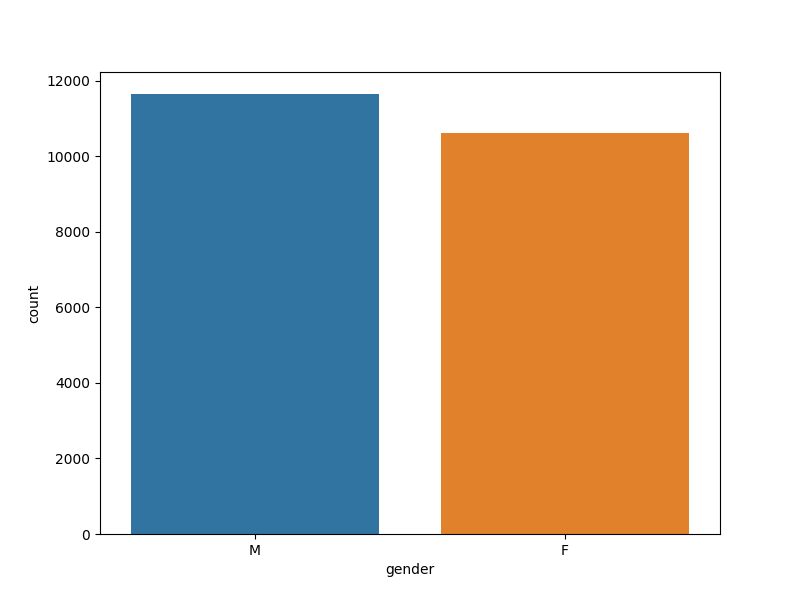

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='count', data=group_gender)
plt.show()
%matplot plt

In [32]:
# Level
spark.sql(
    '''
    SELECT DISTINCT level
    FROM clean_sql
    ORDER BY level
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+
|level|
+-----+
| free|
| paid|
+-----+

In [33]:
# look at distinct users
group_level = spark.sql(
    '''
    SELECT level, count(DISTINCT userId) as count
    FROM clean_sql
    GROUP BY level
    ORDER BY count(*) desc
    '''
).toPandas()

group_level

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  level  count
0  paid  16184
1  free  18792

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

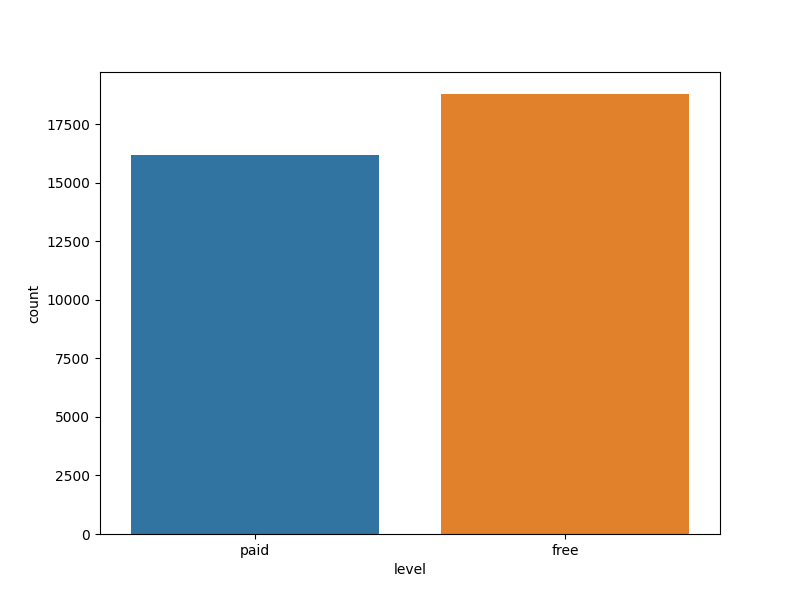

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='level', y='count', data=group_level)
plt.show()
%matplot plt

In [35]:
# Location
spark.sql(
    '''
    SELECT DISTINCT location
    FROM clean_sql
    ORDER BY location
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|            location|
+--------------------+
|        Aberdeen, SD|
|        Aberdeen, WA|
|         Abilene, TX|
|             Ada, OK|
|          Adrian, MI|
|           Akron, OH|
|      Alamogordo, NM|
|          Albany, GA|
|          Albany, OR|
|Albany-Schenectad...|
|       Albemarle, NC|
|      Albert Lea, MN|
|     Albertville, AL|
|     Albuquerque, NM|
|      Alexandria, LA|
|      Alexandria, MN|
|           Alice, TX|
|Allentown-Bethleh...|
|            Alma, MI|
|          Alpena, MI|
+--------------------+
only showing top 20 rows

In [36]:
group_location = spark.sql(
    '''
    SELECT location, count(*) as count
    FROM clean_sql
    GROUP BY location
    ORDER BY count(*) desc
    LIMIT 10
    '''
).toPandas()

group_location

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                       location    count
0         New York-Newark-Jersey City, NY-NJ-PA  1732380
1            Los Angeles-Long Beach-Anaheim, CA  1218495
2            Chicago-Naperville-Elgin, IL-IN-WI   725147
3   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   613289
4               Dallas-Fort Worth-Arlington, TX   568133
5  Washington-Arlington-Alexandria, DC-VA-MD-WV   532650
6     Miami-Fort Lauderdale-West Palm Beach, FL   498435
7          Houston-The Woodlands-Sugar Land, TX   494099
8                   Phoenix-Mesa-Scottsdale, AZ   453895
9             Atlanta-Sandy Springs-Roswell, GA   451231

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

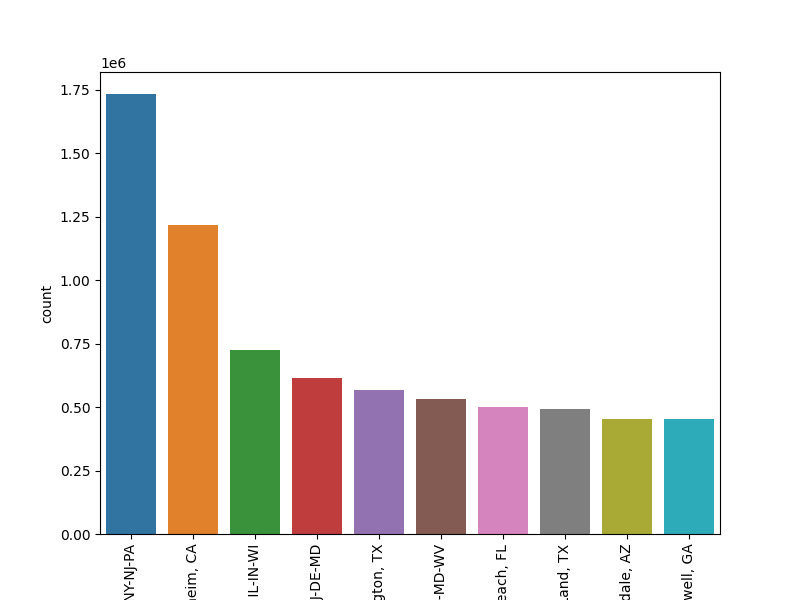

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='location', y='count', data=group_location)
plt.xticks(rotation=90)
plt.show()
%matplot plt

In [38]:
# method
spark.sql(
    '''
    SELECT DISTINCT method
    FROM clean_sql
    ORDER BY method
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|method|
+------+
|   GET|
|   PUT|
+------+

In [39]:
group_method = spark.sql(
    '''
    SELECT method, count(*) as count
    FROM clean_sql
    GROUP BY method
    ORDER BY count(*) desc
    '''
).toPandas()

group_method

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  method     count
0    PUT  23572687
1    GET   1908033

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

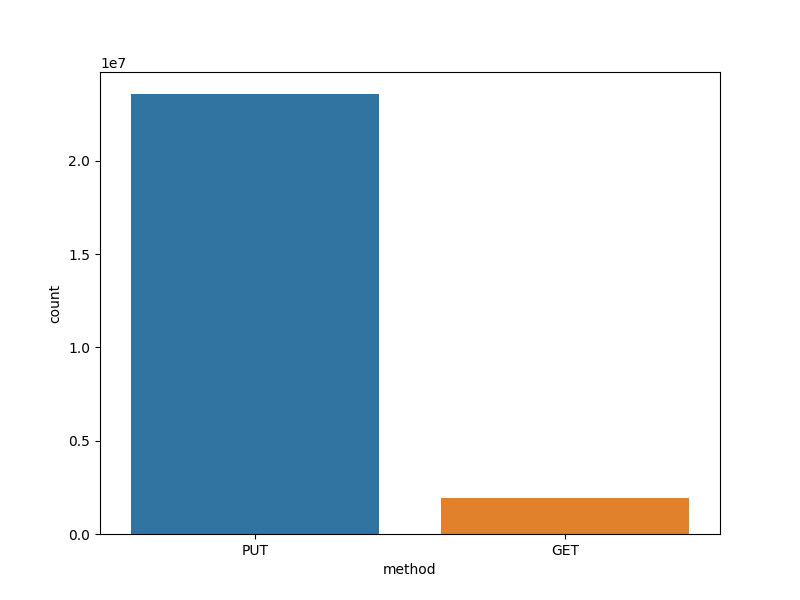

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x='method', y='count', data=group_method)
plt.show()
%matplot plt

In [41]:
# Page
spark.sql(
    '''
    SELECT DISTINCT page
    FROM clean_sql
    ORDER BY page
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|                page|
+--------------------+
|               About|
|          Add Friend|
|     Add to Playlist|
|              Cancel|
|Cancellation Conf...|
|           Downgrade|
|               Error|
|                Help|
|                Home|
|              Logout|
|            NextSong|
|         Roll Advert|
|       Save Settings|
|            Settings|
|    Submit Downgrade|
|      Submit Upgrade|
|         Thumbs Down|
|           Thumbs Up|
|             Upgrade|
+--------------------+

In [42]:
group_page=spark.sql('''
    SELECT page, count(*) as count
    FROM clean_sql
    GROUP BY page
    ORDER BY count(*) desc
    LIMIT 5
    '''
    ).toPandas()

group_page

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              page     count
0         NextSong  20850272
1        Thumbs Up   1151465
2             Home    933124
3  Add to Playlist    597921
4      Roll Advert    385212

In [43]:
spark.sql(
    '''
    SELECT page, count(*) as count
    FROM clean_sql
    GROUP BY page
    ORDER BY count(*) desc
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------+
|                page|   count|
+--------------------+--------+
|            NextSong|20850272|
|           Thumbs Up| 1151465|
|                Home|  933124|
|     Add to Playlist|  597921|
|         Roll Advert|  385212|
|          Add Friend|  381664|
|              Logout|  296005|
|         Thumbs Down|  239212|
|           Downgrade|  184240|
|            Settings|  147074|
|                Help|  129448|
|             Upgrade|   50507|
|               About|   48377|
|       Save Settings|   29516|
|               Error|   25048|
|      Submit Upgrade|   15135|
|    Submit Downgrade|    6494|
|              Cancel|    5003|
|Cancellation Conf...|    5003|
+--------------------+--------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

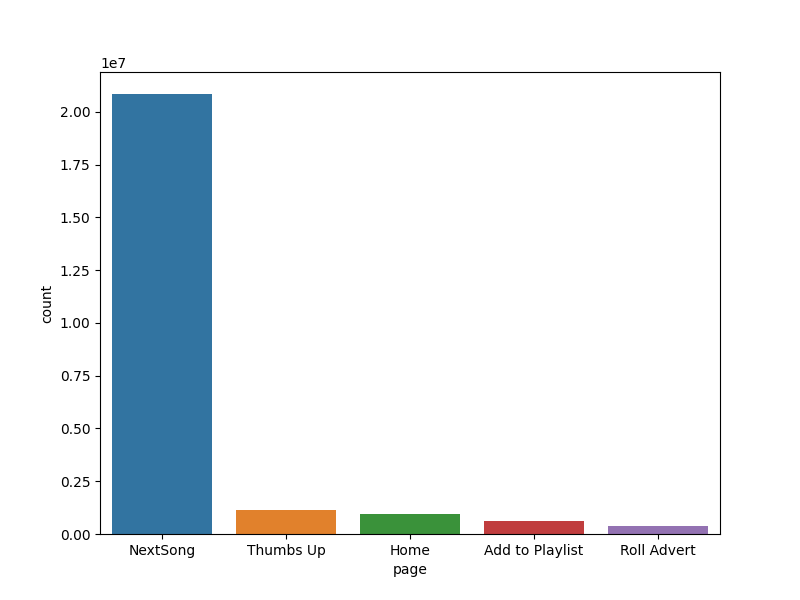

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='page', y='count', data=group_page)
plt.show()
%matplot plt

In [45]:
# Song
spark.sql(
    '''
    SELECT DISTINCT song
    FROM clean_sql
    ORDER BY song
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|                song|
+--------------------+
|                null|
|  Till Kingdom Come|
|Ef ÃÂg HefÃÂ°...|
|Further Complica...|
|Light Mass Prayers|
|The Arsonist Sto...|
|The Arsonist Sto...|
|ÃÂg ÃÂtti Gr...|
| (Jack The Stripper)|
|            - kumo -|
|             Ahi Ahi|
|        Country Song|
| Doom Creeper (Bo...|
|      Energy To Burn|
| I Will Not Reap ...|
|     In a motel room|
| This Feeling (Or...|
|                 You|
|              !@*$%#|
|!Ay... LlevameÃÂ...|
+--------------------+
only showing top 20 rows

In [46]:
group_song = spark.sql(
    '''
    SELECT song, count(*) as count
    FROM clean_sql
    WHERE song IS NOT null
    GROUP BY song
    ORDER BY count(*) DESC
    LIMIT 10
    '''
).toPandas()

group_song

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                song   count
0                                     You're The One  108085
1                                               Undo   94183
2                                            Revelry   77588
3                                      Sehr kosmisch   62450
4  Horn Concerto No. 4 in E flat K495: II. Romanc...   57267
5                     Dog Days Are Over (Radio Edit)   52160
6                                            Secrets   43483
7                                       Use Somebody   42670
8                                             Canada   40765
9                                            Invalid   39253

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

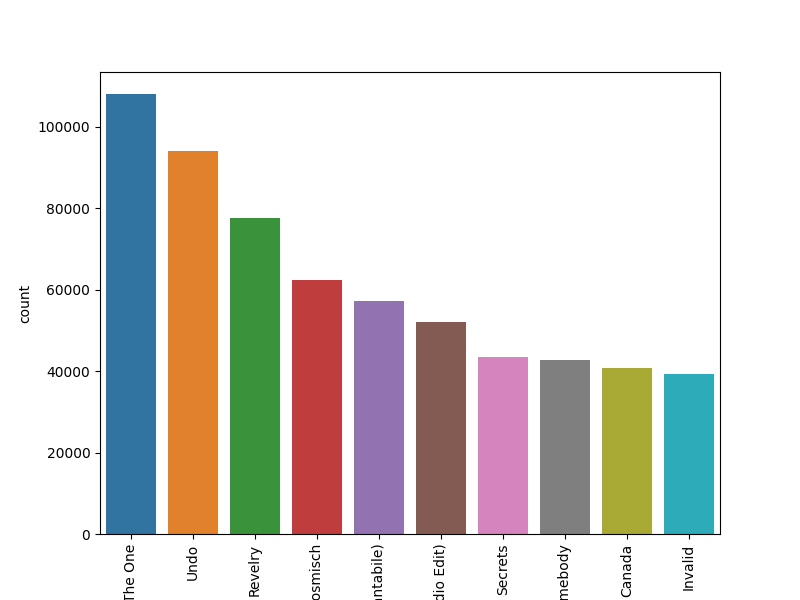

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(x='song', y='count', data=group_song)
plt.xticks(rotation=90)
%matplot plt

In [48]:
# userAgent
spark.sql(
    '''
    SELECT DISTINCT userAgent
    FROM clean_sql
    ORDER BY userAgent
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|           userAgent|
+--------------------+
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
+--------------------+
only showing top 20 rows

In [49]:
group_agent = spark.sql(
    '''
    SELECT userAgent, count(*) as count
    FROM clean_sql
    GROUP BY userAgent
    ORDER BY count(*) DESC
    LIMIT 10
    '''
).toPandas()

group_agent

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                           userAgent    count
0  "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...  2400726
1  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...  1962722
2  "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...  1562542
3  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...  1523670
4  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...  1354485
5  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...  1290830
6  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...  1143199
7  Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...  1097003
8  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...  1050341
9  "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...   861096

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

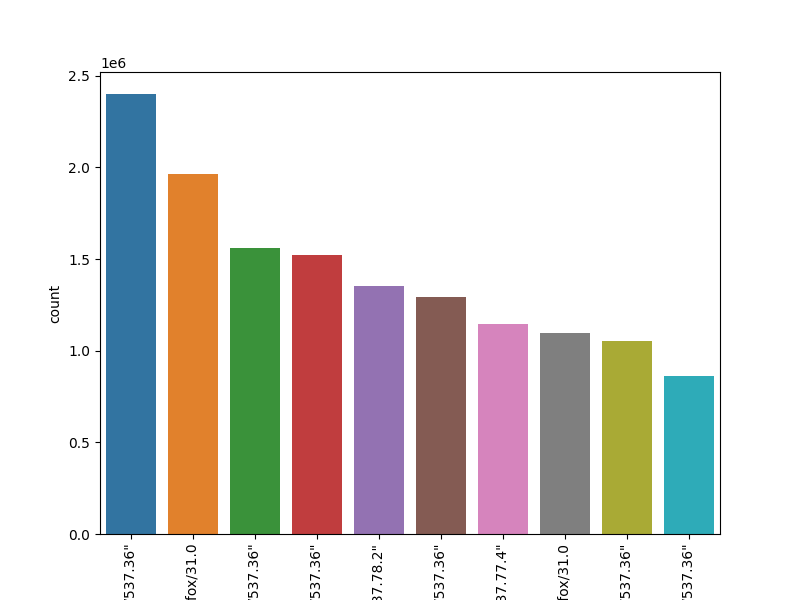

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x='userAgent', y='count', data=group_agent)
plt.xticks(rotation=90)
%matplot plt

In [40]:
# DataTime Conversion
datetime = udf(lambda x: dt.datetime.fromtimestamp(
    int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S"))
year = udf(lambda x: dt.datetime.fromtimestamp(int(x) / 1000).year)
month = udf(lambda x: dt.datetime.fromtimestamp(int(x) / 1000).month)
weekday = udf(lambda x: dt.datetime.fromtimestamp(int(x) / 1000).weekday())
day = udf(lambda x: dt.datetime.fromtimestamp(int(x) / 1000).day)
hour = udf(lambda x: dt.datetime.fromtimestamp(int(x) / 1000).hour)

spark.udf.register('datetime', datetime)
spark.udf.register('year', year)
spark.udf.register('month', month)
spark.udf.register('weekday', weekday)
spark.udf.register('day', day)
spark.udf.register('hour', hour)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function <lambda> at 0x7fefb3f8ebf8>

In [41]:
datetime_data = spark.sql(
    '''
    SELECT userId,
        datetime(registration) AS datetime_registration,
        page,
        datetime(ts) AS datetime_page,
        CAST(year(ts) AS INT) AS year,
        CAST(month(ts) AS INT) AS month,
        CAST(weekday(ts) AS INT) AS weekday,
        CAST(day(ts) AS INT) AS day,
        CAST(hour(ts) AS INT) AS hour
    FROM clean_sql
    '''
)

datetime_data.createOrReplaceTempView('datetime_data')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
datetime_data.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------------------+--------+-------------------+----+-----+-------+---+----+
| userId|datetime_registration|    page|      datetime_page|year|month|weekday|day|hour|
+-------+---------------------+--------+-------------------+----+-----+-------+---+----+
|1749042|  2018-08-08 13:22:21|NextSong|2018-10-01 00:00:01|2018|   10|      0|  1|   0|
|1563081|  2018-09-21 03:25:18|NextSong|2018-10-01 00:00:02|2018|   10|      0|  1|   0|
|1697168|  2018-09-08 13:48:25|NextSong|2018-10-01 00:00:02|2018|   10|      0|  1|   0|
|1222580|  2018-08-16 02:31:00|NextSong|2018-10-01 00:00:03|2018|   10|      0|  1|   0|
|1714398|  2018-09-19 18:23:35|NextSong|2018-10-01 00:00:03|2018|   10|      0|  1|   0|
|1010522|  2018-09-22 07:49:20|NextSong|2018-10-01 00:00:04|2018|   10|      0|  1|   0|
|1475659|  2018-09-10 07:17:33|NextSong|2018-10-01 00:00:05|2018|   10|      0|  1|   0|
|1465194|  2018-09-27 17:29:36|NextSong|2018-10-01 00:00:06|2018|   10|      0|  1|   0|
|1558463|  2018-09-09

In [52]:
group_year = spark.sql(
    '''
    SELECT year, COUNT(*) AS count
    FROM datetime_data
    GROUP BY year
    '''
).toPandas()

group_year

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   year     count
0  2018  25480720

In [53]:
group_month = spark.sql(
    '''
    SELECT month, COUNT(*) AS count
    FROM datetime_data
    GROUP BY month
    '''
).toPandas()

group_month

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   month     count
0     12         2
1     10  13634815
2     11  11845903

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

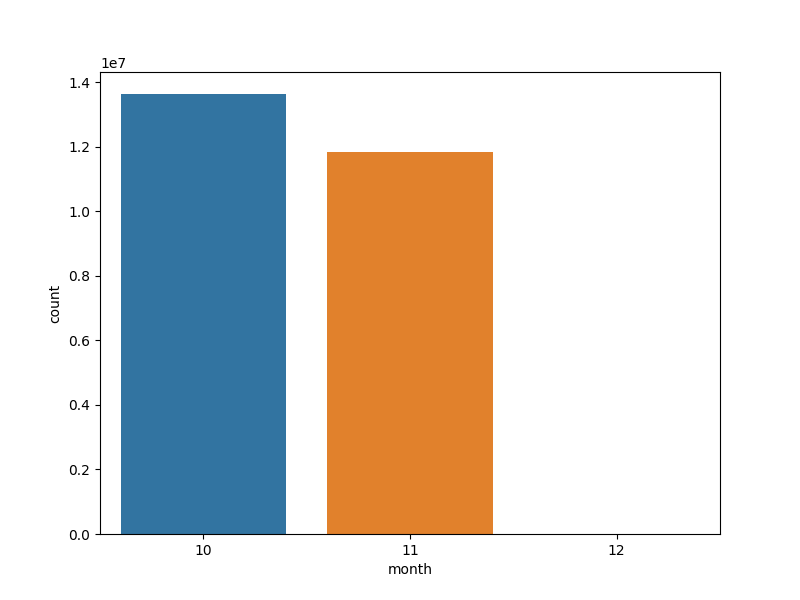

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x='month', y='count', data=group_month)
%matplot plt

In [55]:
group_weekday = spark.sql(
    '''
    SELECT weekday, COUNT(*) AS count
    FROM datetime_data
    GROUP BY weekday
    '''
).toPandas()

group_weekday

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   weekday    count
0        1  4337607
1        6  2136466
2        3  4157780
3        5  2451715
4        4  4207911
5        2  4277530
6        0  3911711

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

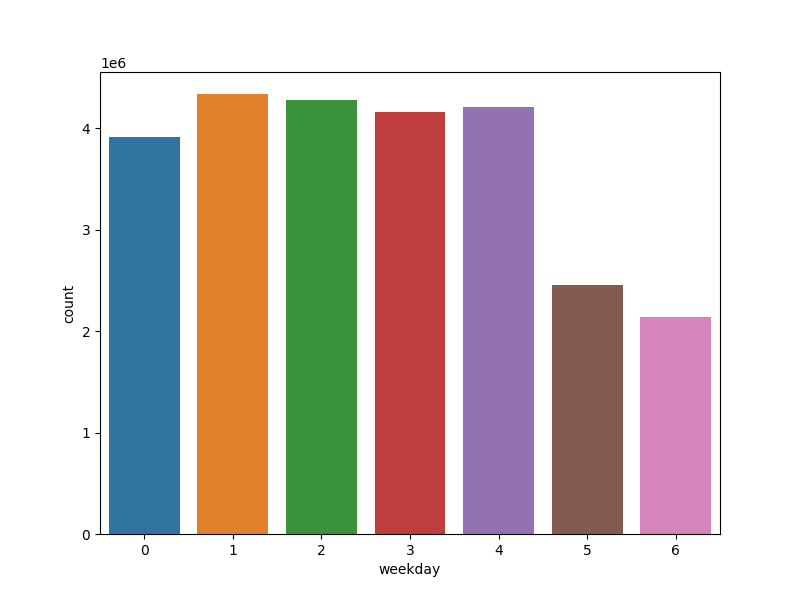

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x='weekday', y='count', data=group_weekday)
%matplot plt

In [57]:
group_day = spark.sql(
    '''
    SELECT day, COUNT(*) AS count
    FROM datetime_data
    GROUP BY day
    '''
).toPandas()

group_day

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    day   count
0    31  483206
1    28  716307
2    26  887465
3    27  757380
4    12  923531
5    22  744768
6     1  905920
7    13  801174
8    16  957956
9     6  780820
10    3  774471
11   20  775770
12    5  909075
13   19  922196
14   15  930703
15    9  969296
16   17  785660
17    4  768329
18    8  937236
19   23  885210
20    7  754408
21   10  810367
22   25  755094
23   24  769486
24   29  882251
25   21  733207
26   11  774531
27   14  737335
28    2  951825
29   30  934749
30   18  760994

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

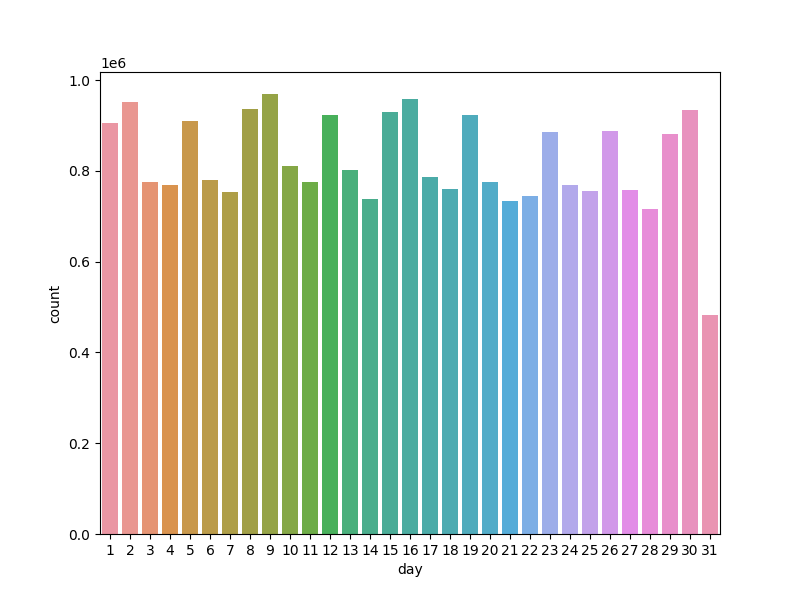

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='count', data=group_day)
%matplot plt

In [59]:
group_hour = spark.sql(
    '''
    SELECT hour, COUNT(*) AS count
    FROM datetime_data
    GROUP BY hour
    '''
).toPandas()

group_hour

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    hour    count
0     12  1015827
1     22  1106403
2      1   992383
3     13  1081852
4      6   900705
5     16  1312286
6      3   941090
7     20  1200570
8      5   909821
9     19  1247841
10    15  1263211
11     9   911252
12    17  1311277
13     4   922020
14     8   900843
15    23  1068772
16     7   896542
17    10   932124
18    21  1151161
19    11   968600
20    14  1169349
21     2   963701
22     0  1025229
23    18  1287861

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

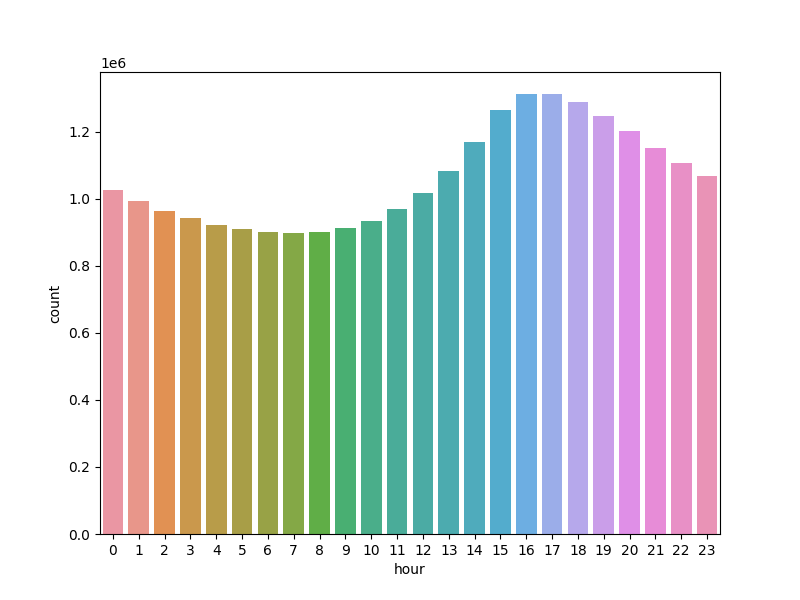

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x='hour', y='count', data=group_hour)
%matplot plt

In [32]:
# Find Cancellation and mark churn
churn_sql = spark.sql(
    '''
    SELECT u.*,
        (CASE WHEN c.userId IS null THEN 0
              ELSE 1
         END) AS churn
    FROM clean_sql AS u
    LEFT JOIN 
    (SELECT userId 
     FROM clean_sql
     WHERE page = 'Cancellation Confirmation') AS c
    ON u.userId = c.userId
    '''
)

churn_sql.createOrReplaceTempView('churn_sql')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
churn_sql.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+---------+------+-------------+--------+---------+-----+-----------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+-----+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|   location|method|       page| registration|sessionId|                song|status|           ts|           userAgent| userId|churn|
+--------------------+---------+---------+------+-------------+--------+---------+-----+-----------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+-----+
|       The Maccabees|Logged In|    Frank|     M|            0|  Warren| 45.34812| free|Findlay, OH|   PUT|   NextSong|1535470939000|     6221|   Diamond Solitaire|   200|1538650776000|Mozilla/5.0 (Wind...|1000280|    1|
|       Tiziano Ferro|Logged In|    Frank|     M|            1|  Warren|226.53342| free|Findlay, OH|   PUT|   NextSo

In [33]:
# Explore Churn
spark.sql(
    '''
    SELECT churn, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn
    '''
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|churn|count|
+-----+-----+
|    1| 5003|
|    0|17274|
+-----+-----+

In [34]:
# total_activity
total_activity = spark.sql(
    '''
    SELECT a.userId, a.total_activity, c.churn
    FROM (SELECT userId, COUNT(*) AS total_activity
          FROM clean_sql
          GROUP BY userId) AS a
    JOIN (SELECT userId, max(churn) as churn
               FROM churn_sql
               GROUP BY userId) as c
    ON a.userId=c.userId
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
# churn=0 tends to have less activities
total_activity_df = total_activity.toPandas()
total_activity_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        userId  total_activity  churn
0      1000280            1317      1
1      1002185            2080      0
2      1017805             320      0
3      1030587            1752      0
4      1033297             299      0
...        ...             ...    ...
22272  1930015            1184      0
22273  1955029             567      0
22274  1960992             120      0
22275  1977992             668      0
22276  1981978             219      1

[22277 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

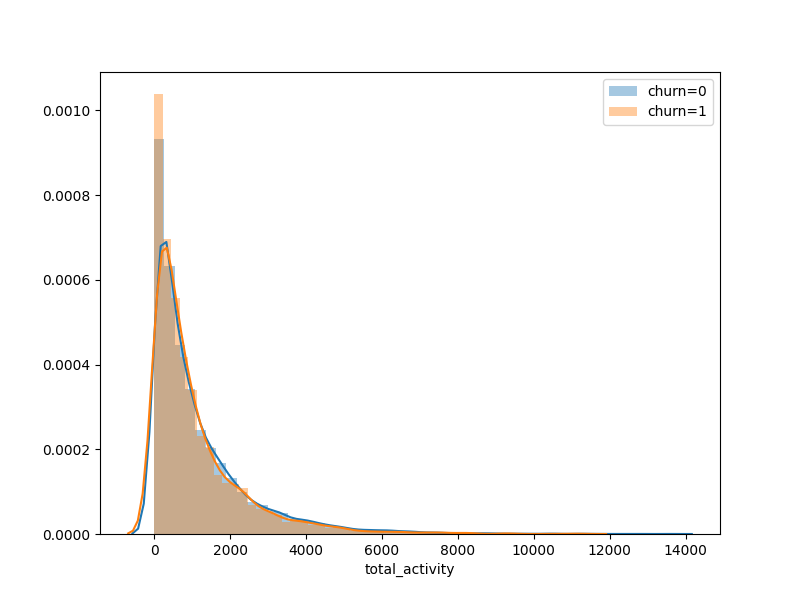

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(
    total_activity_df[total_activity_df['churn'] == 0]['total_activity'],label='churn=0')
sns.distplot(
    total_activity_df[total_activity_df['churn'] == 1]['total_activity'],label='churn=1')
plt.legend()
%matplot plt

In [27]:
total_activity.createOrReplaceTempView('total_activity')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
# Churn * Auth

churn_auth = spark.sql(
    '''
    SELECT churn, auth, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, auth
    '''
).toPandas()

churn_auth

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn       auth  count
0      1  Cancelled   5003
1      0  Logged In  17274
2      1  Logged In   5003

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

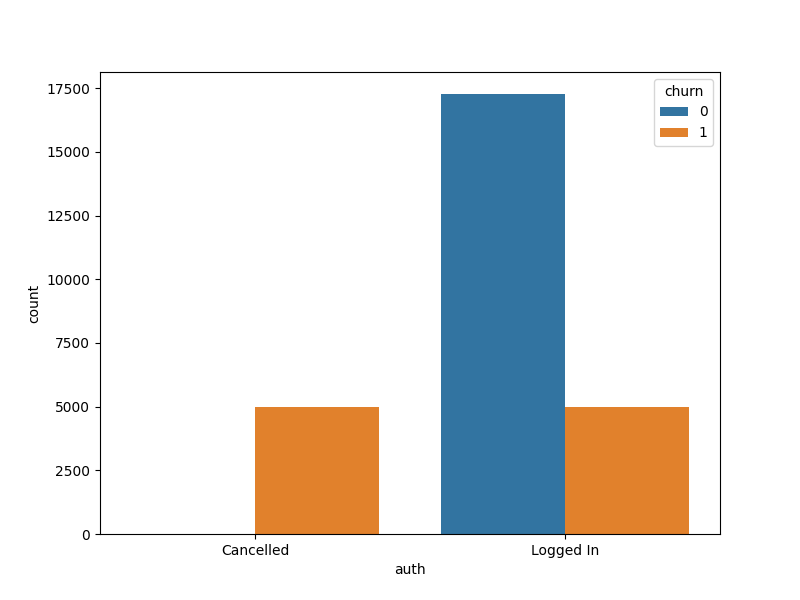

In [68]:
# churn users never cancel login
plt.figure(figsize=(8,6))
sns.barplot(x='auth', y='count', hue='churn', data=churn_auth)
%matplot plt

In [69]:
# churn * gender
churn_gender = spark.sql(
    '''
    SELECT churn, gender, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, gender
    '''
).toPandas()

churn_gender

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn gender  count
0      1      F   2347
1      0      M   8995
2      1      M   2656
3      0      F   8279

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

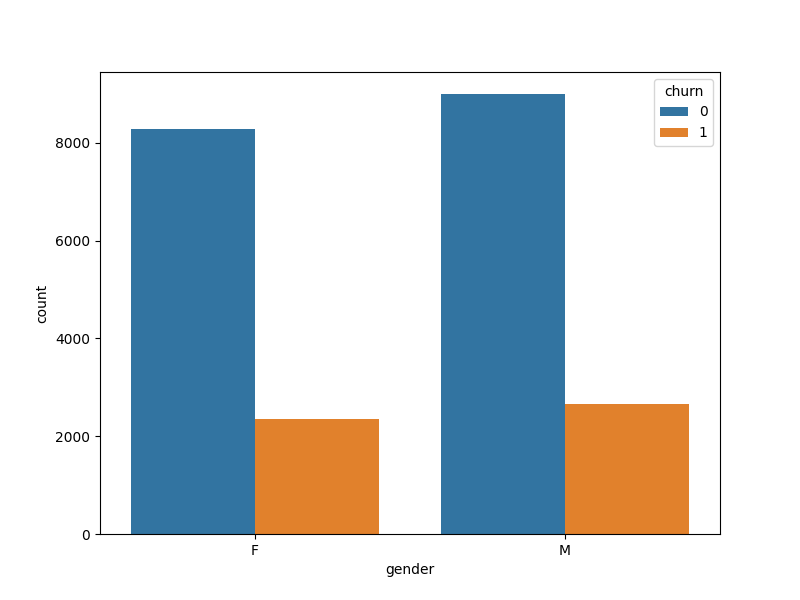

In [70]:
# Man cancels more that woman
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='count', hue='churn', data=churn_gender)
%matplot plt

In [71]:
# churn * gender
churn_level = spark.sql(
    '''
    SELECT churn, level, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, level
    '''
).toPandas()

churn_level

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn level  count
0      0  free  14645
1      0  paid  12293
2      1  paid   3891
3      1  free   4147

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

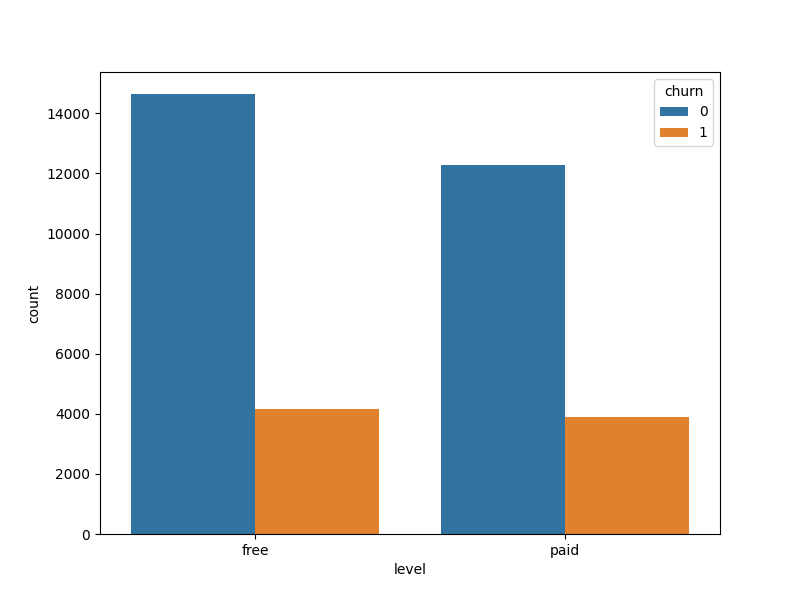

In [72]:
# Free users are easier to quit.
plt.figure(figsize=(8,6))
sns.barplot(x='level', y='count', hue='churn', data=churn_level)
%matplot plt

In [73]:
# churn * page
churn_page = spark.sql(
    '''
    SELECT churn, page, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, page
    '''
).toPandas()

churn_page

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    churn                       page  count
0       0              Save Settings   9570
1       1                     Logout   4625
2       0           Submit Downgrade   3960
3       0                   NextSong  17259
4       1              Save Settings   2667
5       1                Roll Advert   4551
6       0                 Add Friend  15794
7       0                      Error   8813
8       0            Add to Playlist  16517
9       0                      About  11348
10      1                   Settings   4276
11      1             Submit Upgrade   2894
12      0                  Thumbs Up  16890
13      1  Cancellation Confirmation   5003
14      1            Add to Playlist   4743
15      1                   NextSong   5002
16      1                       Home   4936
17      1                    Upgrade   3588
18      0                Thumbs Down  15464
19      1           Submit Downgrade   1143
20      1                       Help   3999
21      1                 Add Fr

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

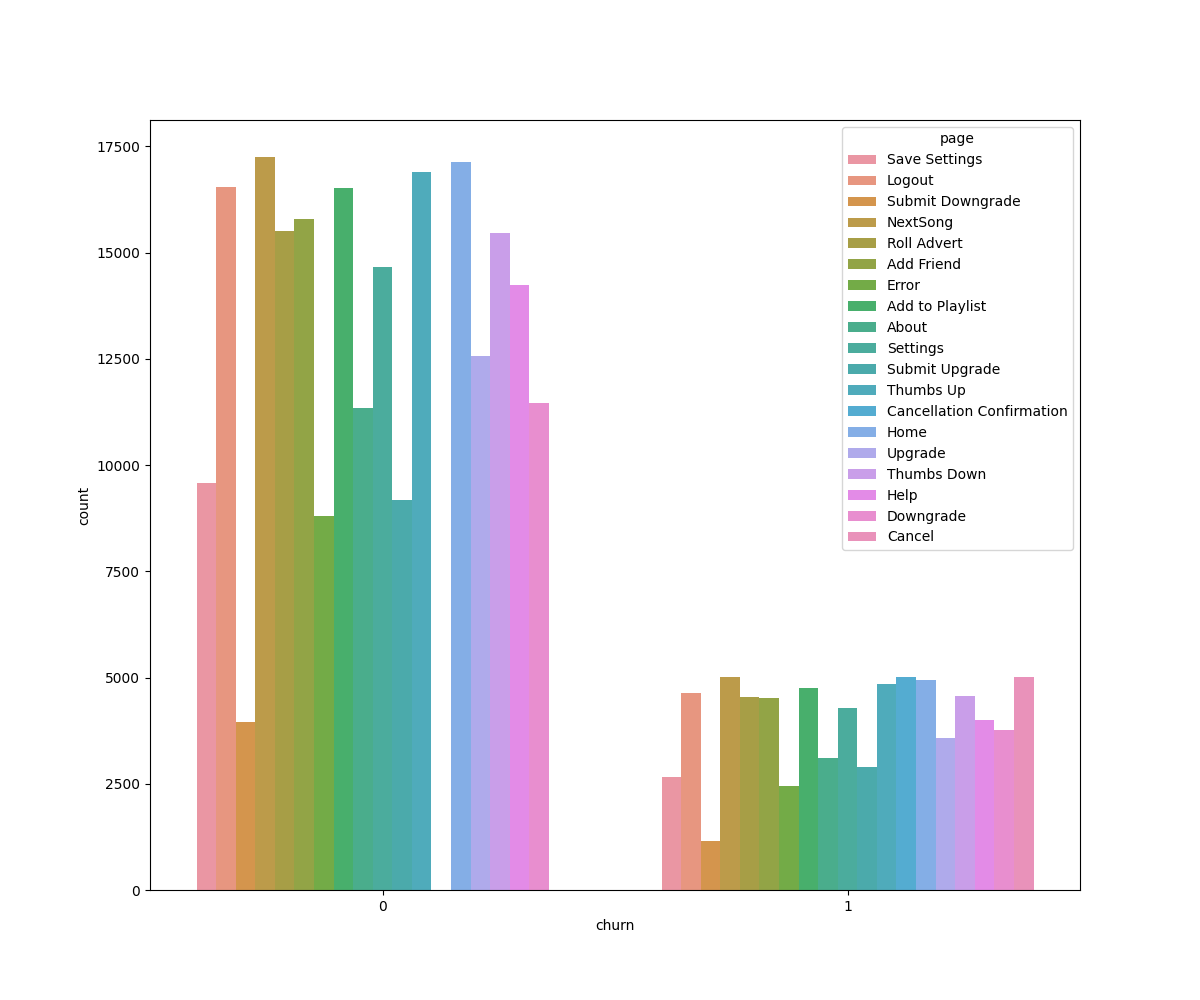

In [74]:
plt.figure(figsize=(12,10))
sns.barplot(x='churn', y='count', hue='page', data=churn_page)
%matplot plt

In [75]:
# churn*month
churn_month = spark.sql(
    '''
    SELECT churn, CAST(month(ts) AS INT) AS M, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, M
    '''
).toPandas()

churn_month

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn   M  count
0      1  11   2125
1      0  10  16295
2      0  11  16433
3      1  10   4961
4      0  12      2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

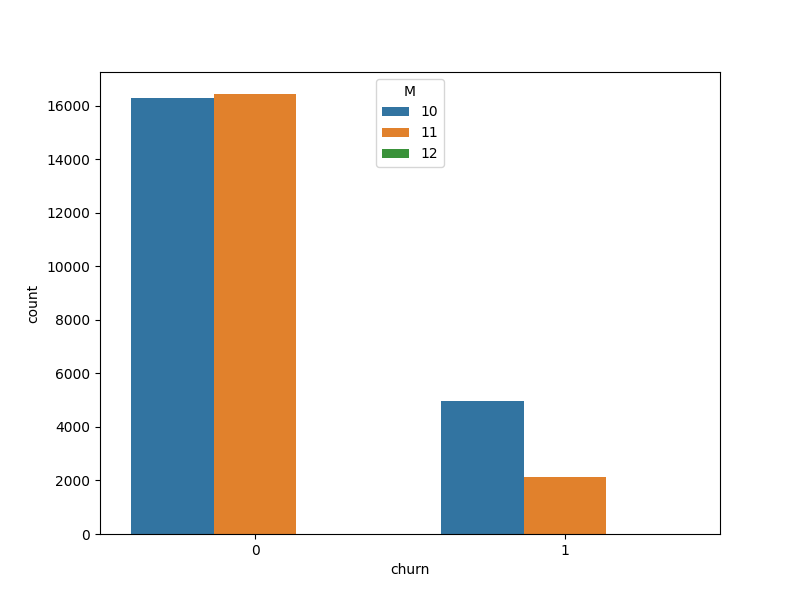

In [76]:
# far more quit in October, the first month
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='count', hue='M', data=churn_month)
%matplot plt

In [77]:
# churn*weekday
churn_weekday = spark.sql(
    '''
    SELECT churn, CAST(weekday(ts) AS INT) AS W, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, W
    '''
).toPandas()
churn_weekday

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    churn  W  count
0       1  0   3973
1       1  2   3807
2       0  5  10906
3       1  1   3925
4       1  3   3737
5       0  0  13481
6       1  4   3589
7       0  1  13840
8       1  5   2872
9       0  6  10441
10      0  2  13822
11      0  3  13595
12      1  6   2762
13      0  4  13744

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

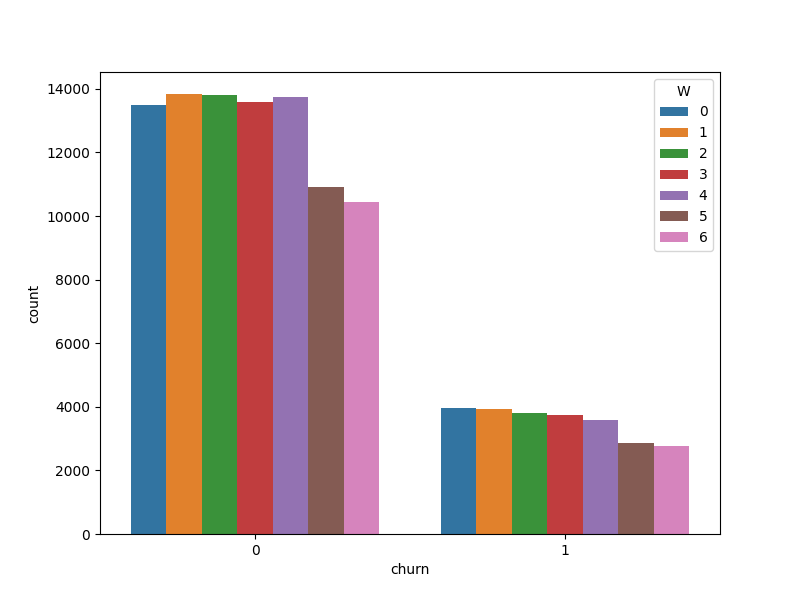

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='count', hue='W', data=churn_weekday)
%matplot plt

In [79]:
# churn*weekday
churn_day = spark.sql(
    '''
    SELECT churn, CAST(day(ts) AS INT) AS D, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, D
    '''
).toPandas()
churn_day

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    churn   D  count
0       0  25   5983
1       1  25   1261
2       0  13   6134
3       0  20   6137
4       1   7   1771
..    ...  ..    ...
57      1  10   1988
58      0   4   5730
59      0  12   6853
60      0  21   6023
61      0  23   6959

[62 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

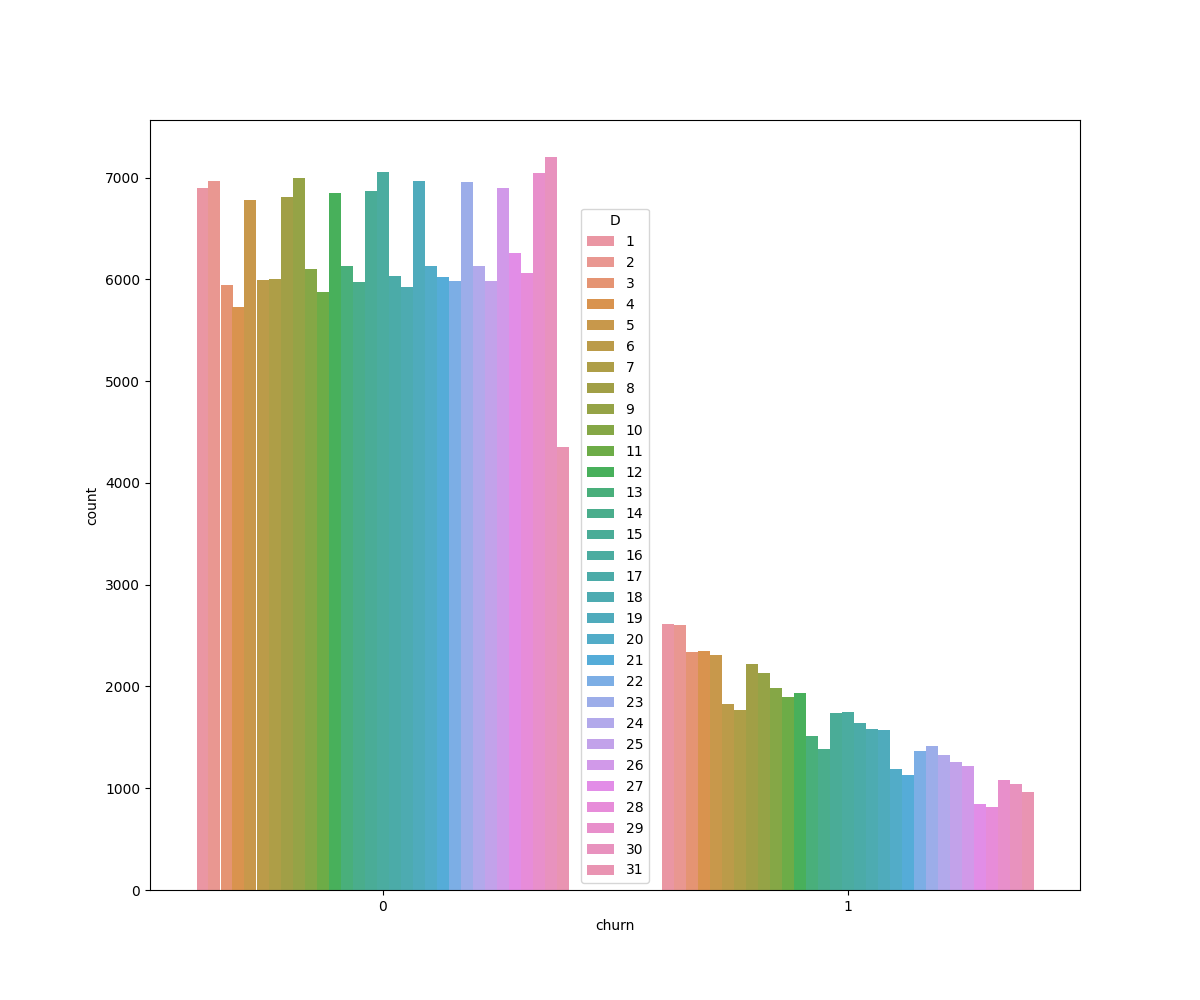

In [80]:
# higher quit in first half of month, sharp difference between weekdays and weekends
plt.figure(figsize=(12, 10))
sns.barplot(x='churn', y='count', hue='D', data=churn_day)
%matplot plt

In [81]:
# churn*weekday
churn_hour = spark.sql(
    '''
    SELECT churn, CAST(hour(ts) AS INT) AS H, count(DISTINCT userId) as count
    FROM churn_sql
    GROUP BY churn, H
    '''
).toPandas()
churn_hour

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    churn   H  count
0       1   0   3741
1       0  13  13948
2       0  20  14057
3       1   7   3587
4       1  20   3994
5       0  14  14300
6       1   2   3631
7       0   7  12913
8       1   9   3653
9       0   5  12816
10      1  22   3813
11      1   1   3694
12      1   3   3603
13      0  22  13611
14      1  11   3743
15      0  16  14525
16      0   0  13276
17      1   4   3588
18      0  10  13107
19      0  17  14471
20      1   8   3611
21      1  16   4222
22      1  19   4074
23      1  23   3738
24      0   9  12973
25      0  15  14464
26      0  18  14358
27      1  18   4144
28      1  14   4070
29      0  11  13378
30      1  21   3909
31      0   1  13104
32      0  19  14199
33      1  17   4181
34      1  12   3852
35      0   8  12968
36      1   5   3565
37      1  15   4195
38      0   6  12899
39      0   2  13006
40      1  13   3952
41      0   3  12968
42      1   6   3561
43      1  10   3706
44      0   4  12878
45      0  12  13668
46      0  21

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

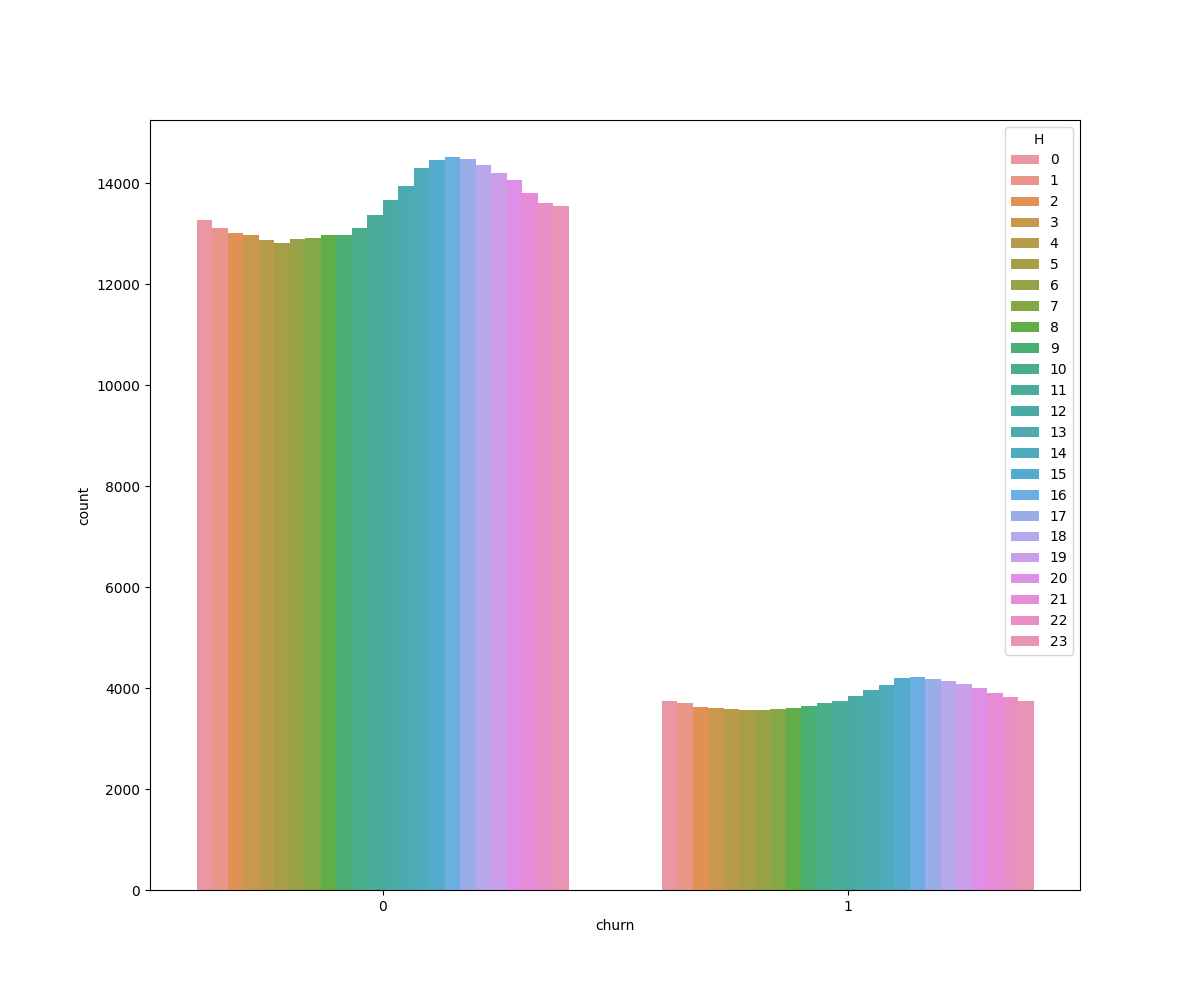

In [82]:
# higher quit in first half of month
plt.figure(figsize=(12, 10))
sns.barplot(x='churn', y='count', hue='H', data=churn_hour)
%matplot plt

In [42]:
# churn * registration
churn_registration = spark.sql(
    '''
    SELECT d.userId, registration_days, c.churn
    FROM (SELECT userId, DATEDIFF(MAX(datetime_page), MIN(datetime_registration)) AS registration_days
          FROM datetime_data
          GROUP BY userId) as d 
    JOIN (SELECT userId, max(churn) as churn
               FROM churn_sql
               GROUP BY userId) as c
    ON d.userId=c.userId
               
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
# Churn=1 are more left skewed.
churn_registration_df = churn_registration.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

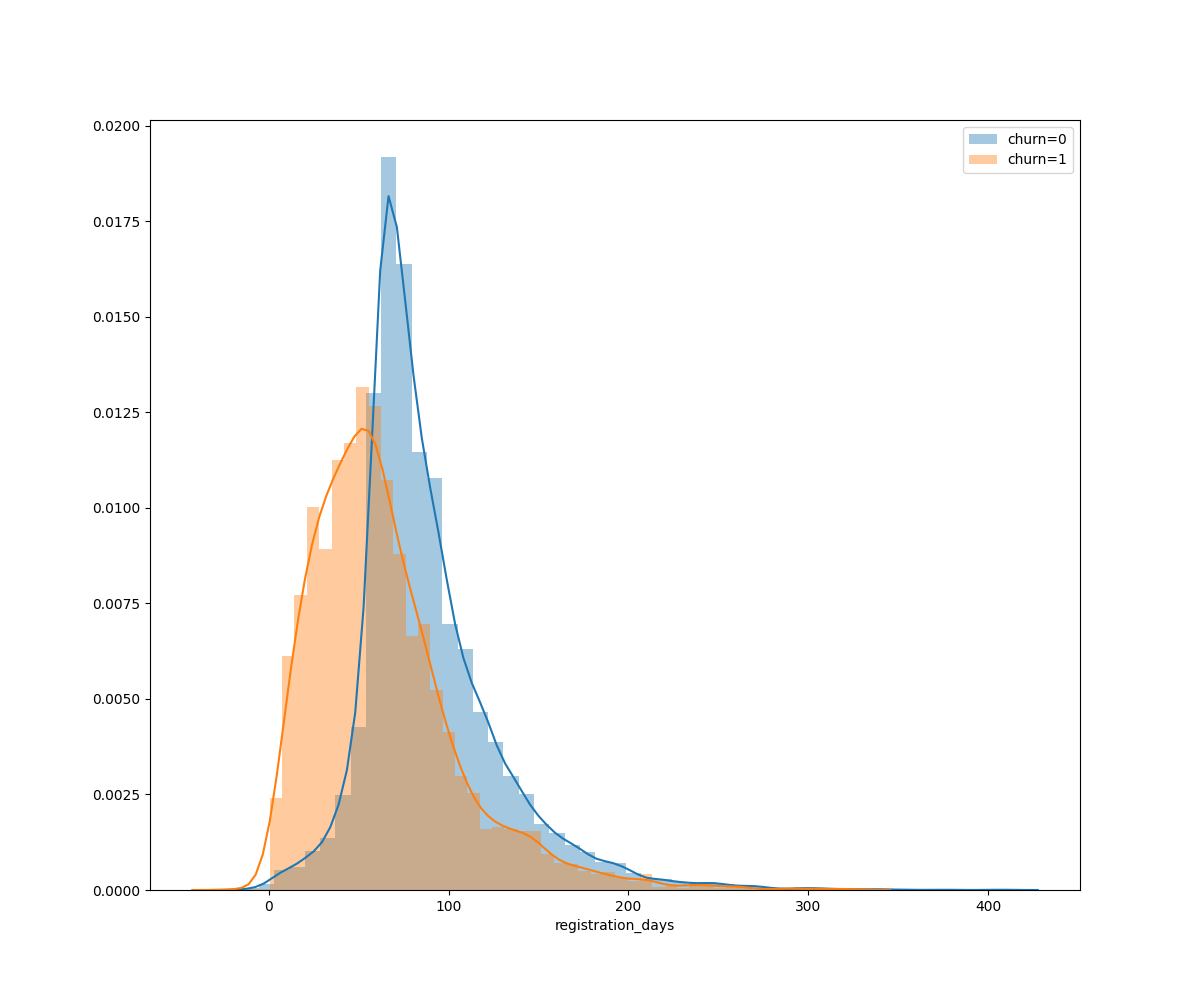

In [44]:
plt.figure(figsize=(12, 10))
sns.distplot(
    churn_registration_df[churn_registration_df['churn'] == 0]['registration_days'],label='churn=0')
sns.distplot(
    churn_registration_df[churn_registration_df['churn'] == 1]['registration_days'],label='churn=1')
plt.legend()
%matplot plt

In [29]:
churn_registration.createOrReplaceTempView('churn_registration')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# churn*last week activity
churn_week_count = spark.sql(
    '''
    SELECT w.userId, w.week_count, c.churn
    FROM
    (
        SELECT d.userId, COUNT(d.userId) AS week_count        
        FROM datetime_data d
        JOIN 
        (
            SELECT userId, MAX(datetime_page) AS last_datetime
            FROM datetime_data
            GROUP BY userId
        ) AS l
        ON l.userId = d.userId
        WHERE d.datetime_page >= DATE_SUB(l.last_datetime, 7)
        GROUP BY d.userId
    ) AS w
    JOIN (SELECT userId, max(churn) as churn
               FROM churn_sql
               GROUP BY userId) as c
    ON w.userId=c.userId
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [88]:
# churn=0 not active in the last week
churn_week_count_df = churn_week_count.toPandas()
churn_week_count_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        userId  week_count  churn
0      1000280         188      1
1      1002185         348      0
2      1017805         153      0
3      1030587         507      0
4      1033297         197      0
...        ...         ...    ...
22272  1930015         243      0
22273  1955029         160      0
22274  1960992          95      0
22275  1977992         140      0
22276  1981978          18      1

[22277 rows x 3 columns]

In [89]:
(churn_week_count_df[churn_week_count_df['churn'] == 0]['week_count'].mean(
), churn_week_count_df[churn_week_count_df['churn'] == 1]['week_count'].mean())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(228.6392844737756, 352.05196881870876)

In [31]:
churn_week_count.createOrReplaceTempView('churn_week_count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
churn_artist_count = spark.sql(
    '''
    SELECT a.userId, a.artist_count, c.churn
    FROM (SELECT userId, COUNT(DISTINCT artist) AS artist_count
          FROM clean_sql
          GROUP BY userId) AS a
    JOIN (SELECT userId, max(churn) as churn
               FROM churn_sql
               GROUP BY userId) as c
    ON a.userId=c.userId
    '''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
churn_artist_count_df = churn_artist_count.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
churn_artist_count.createOrReplaceTempView('churn_artist_count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

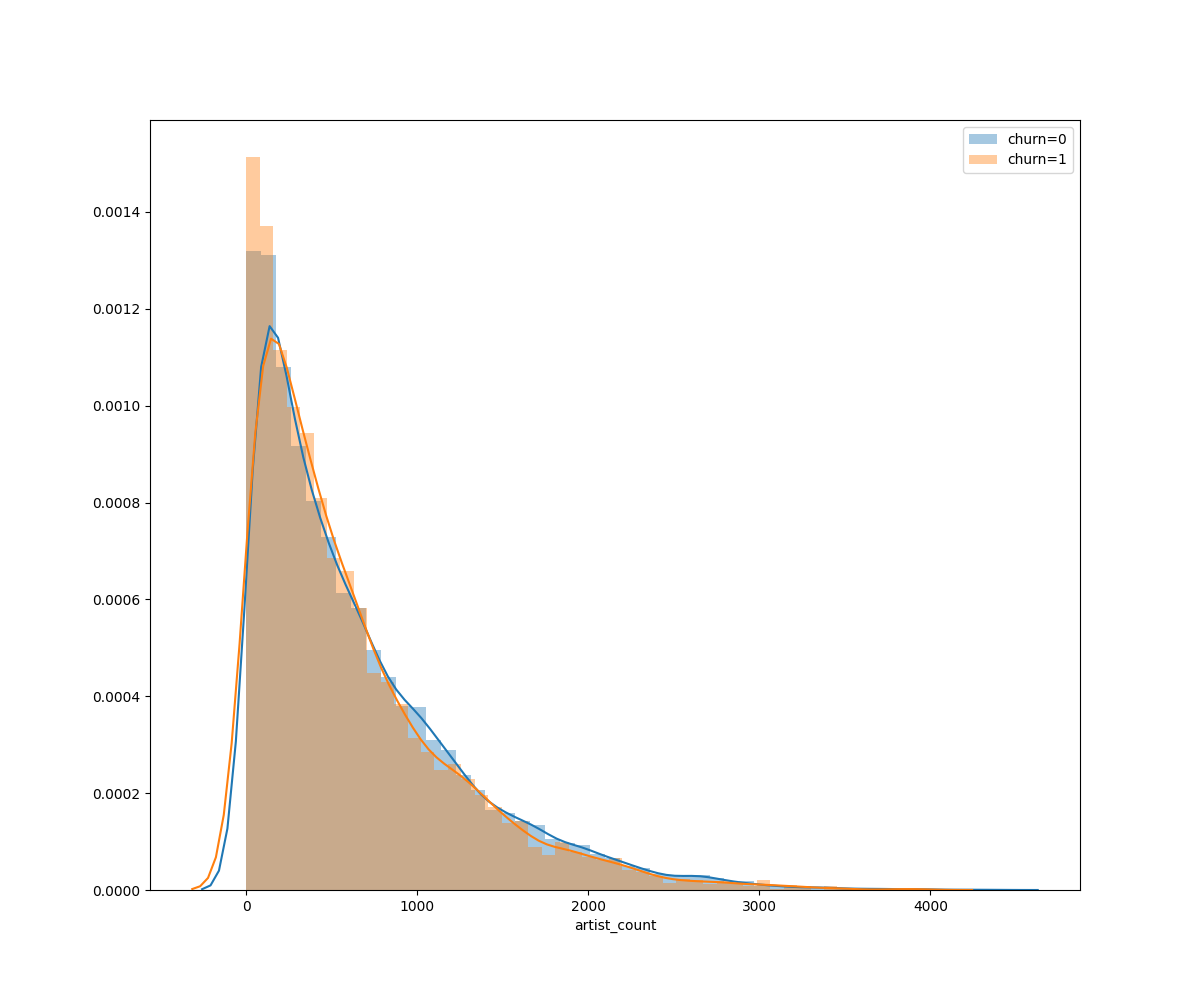

In [47]:
# churn=0 artist tends to be smaller
plt.figure(figsize=(12, 10))
sns.distplot(
    churn_artist_count_df[churn_artist_count_df['churn'] == 0]['artist_count'],label='churn=0')
sns.distplot(
    churn_artist_count_df[churn_artist_count_df['churn'] == 1]['artist_count'],label='churn=1')
plt.legend()
%matplot plt

# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

In [34]:
# From the data exploration, we choose gender, level, page, total_visited_page, artist_count, week_count, registration as independent variables
# we need to extend gender, level and page

extension = ''
for i in ['gender', 'level', 'page']:
    category = spark.sql('''SELECT DISTINCT ''' + i +
                         ''' FROM clean_sql''').toPandas()[i].values
    for j in category:
        extension += ', CASE WHEN ' + i + "= '" + j + \
            "' THEN 1 ELSE 0 END AS " + i + '_' + j.replace(' ', '_')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
# extend records into binary nums

extension = '''SELECT userId, churn ''' + extension + ''' FROM churn_sql'''
extension_table = spark.sql(extension)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [96]:
extension_table.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--------------+---------+------------+----------+-------------------+
| userId|churn|gender_F|gender_M|level_free|level_paid|page_Cancel|page_Submit_Downgrade|page_Thumbs_Down|page_Home|page_Downgrade|page_Roll_Advert|page_Logout|page_Save_Settings|page_Cancellation_Confirmation|page_About|page_Settings|page_Add_to_Playlist|page_Add_Friend|page_NextSong|page_Thumbs_Up|page_Help|page_Upgrade|page_Error|page_Submit_Upgrade|
+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--

In [36]:
extension_table.createOrReplaceTempView('extension_table')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# sum up records by users
sumup = ''
for i in ['gender', 'level', 'page']:
    category = spark.sql('''SELECT DISTINCT ''' + i +
                         ''' FROM clean_sql''').toPandas()[i].values
    for j in category:
        sumup += ', SUM(' + i + '_' + j.replace(' ', '_') + \
            ') AS ' + i + '_' + j.replace(' ', '_')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
sumup = '''SELECT userId, SUM(churn) AS churn ''' + \
    sumup + ''' FROM extension_table GROUP BY userId'''

sum_table = spark.sql(sumup)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
sum_table.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--------------+---------+------------+----------+-------------------+
| userId|churn|gender_F|gender_M|level_free|level_paid|page_Cancel|page_Submit_Downgrade|page_Thumbs_Down|page_Home|page_Downgrade|page_Roll_Advert|page_Logout|page_Save_Settings|page_Cancellation_Confirmation|page_About|page_Settings|page_Add_to_Playlist|page_Add_Friend|page_NextSong|page_Thumbs_Up|page_Help|page_Upgrade|page_Error|page_Submit_Upgrade|
+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--

In [39]:
sum_table.createOrReplaceTempView('sum_table')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
# transform the table, make churn, gender, level 0-1
transform = '''SELECT userId, CASE WHEN Churn > 0 THEN 1 ELSE 0 END AS churn'''
for i in sum_table.columns[2:]:
    if i.split('_')[0] == 'page':
        transform += ', '+i
    else:
        transform += ', CASE WHEN '+i+' >0 THEN 1 ELSE 0 END AS '+i

transform += ' FROM sum_table'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
transform_table = spark.sql(transform)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
transform_table.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--------------+---------+------------+----------+-------------------+
| userId|churn|gender_F|gender_M|level_free|level_paid|page_Cancel|page_Submit_Downgrade|page_Thumbs_Down|page_Home|page_Downgrade|page_Roll_Advert|page_Logout|page_Save_Settings|page_Cancellation_Confirmation|page_About|page_Settings|page_Add_to_Playlist|page_Add_Friend|page_NextSong|page_Thumbs_Up|page_Help|page_Upgrade|page_Error|page_Submit_Upgrade|
+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--

In [42]:
transform_table.createOrReplaceTempView('transform_table')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
# bind the table with total_visited_page, artist_count, week_count, registration

final = spark.sql(
    '''
    SELECT transform_table.*,
           churn_registration.registration_days,
           churn_artist_count.artist_count,
           total_activity.total_activity,
           churn_week_count.week_count
    FROM transform_table
    JOIN churn_registration
    ON transform_table.userId=churn_registration.userId
    JOIN churn_artist_count
    ON transform_table.userId=churn_artist_count.userId
    JOIN total_activity
    ON transform_table.userId=total_activity.userId
    JOIN churn_week_count
    ON transform_table.userId=churn_week_count.userId
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [103]:
final.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--------------+---------+------------+----------+-------------------+-----------------+------------+--------------+----------+
| userId|churn|gender_F|gender_M|level_free|level_paid|page_Cancel|page_Submit_Downgrade|page_Thumbs_Down|page_Home|page_Downgrade|page_Roll_Advert|page_Logout|page_Save_Settings|page_Cancellation_Confirmation|page_About|page_Settings|page_Add_to_Playlist|page_Add_Friend|page_NextSong|page_Thumbs_Up|page_Help|page_Upgrade|page_Error|page_Submit_Upgrade|registration_days|artist_count|total_activity|week_count|
+-------+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+--------------

In [52]:
final.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['userId', 'churn', 'gender_F', 'gender_M', 'level_free', 'level_paid', 'page_Cancel', 'page_Submit_Downgrade', 'page_Thumbs_Down', 'page_Home', 'page_Downgrade', 'page_Roll_Advert', 'page_Logout', 'page_Save_Settings', 'page_Cancellation_Confirmation', 'page_About', 'page_Settings', 'page_Add_to_Playlist', 'page_Add_Friend', 'page_NextSong', 'page_Thumbs_Up', 'page_Help', 'page_Upgrade', 'page_Error', 'page_Submit_Upgrade', 'registration_days', 'artist_count', 'total_activity', 'week_count']

In [44]:
final.createOrReplaceTempView('final')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
no_id = '''SELECT '''
for i in final.columns[1:]:
    no_id += i+','

no_id = no_id[:-1]+''' FROM final'''

final = spark.sql(no_id)
final.createOrReplaceTempView('final')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [106]:
final.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+------------------------------+----------+-------------+--------------------+---------------+-------------+--------------+---------+------------+----------+-------------------+-----------------+------------+--------------+----------+
|churn|gender_F|gender_M|level_free|level_paid|page_Cancel|page_Submit_Downgrade|page_Thumbs_Down|page_Home|page_Downgrade|page_Roll_Advert|page_Logout|page_Save_Settings|page_Cancellation_Confirmation|page_About|page_Settings|page_Add_to_Playlist|page_Add_Friend|page_NextSong|page_Thumbs_Up|page_Help|page_Upgrade|page_Error|page_Submit_Upgrade|registration_days|artist_count|total_activity|week_count|
+-----+--------+--------+----------+----------+-----------+---------------------+----------------+---------+--------------+----------------+-----------+------------------+-------------------

In [38]:
final.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['churn', 'gender_F', 'gender_M', 'level_free', 'level_paid', 'page_Cancel', 'page_Submit_Downgrade', 'page_Thumbs_Down', 'page_Home', 'page_Downgrade', 'page_Roll_Advert', 'page_Logout', 'page_Save_Settings', 'page_Cancellation_Confirmation', 'page_About', 'page_Settings', 'page_Add_to_Playlist', 'page_Add_Friend', 'page_NextSong', 'page_Thumbs_Up', 'page_Help', 'page_Upgrade', 'page_Error', 'page_Submit_Upgrade', 'registration_days', 'artist_count', 'total_activity', 'week_count']

In [45]:
final.write.save('final.json',format='json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

In [16]:
final=spark.read.json("final.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
final.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['artist_count', 'churn', 'gender_F', 'gender_M', 'level_free', 'level_paid', 'page_About', 'page_Add_Friend', 'page_Add_to_Playlist', 'page_Cancel', 'page_Cancellation_Confirmation', 'page_Downgrade', 'page_Error', 'page_Help', 'page_Home', 'page_Logout', 'page_NextSong', 'page_Roll_Advert', 'page_Save_Settings', 'page_Settings', 'page_Submit_Downgrade', 'page_Submit_Upgrade', 'page_Thumbs_Down', 'page_Thumbs_Up', 'page_Upgrade', 'registration_days', 'total_activity', 'userId', 'week_count']

In [18]:
# Vector Assembler

cols=[i for i in final.columns if i not in ['churn','userId','page_Cancel','page_Cancellation_Confirmation']]

assembler = VectorAssembler(inputCols=cols, outputCol='features')
df = assembler.transform(final)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# Standard Scaler
scaler = StandardScaler(inputCol='features',
                        outputCol='features_scale', withStd=True)
df = scaler.fit(df).transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

22277

In [21]:
# select features and churn label
df = df.select(df.churn.alias('label'), df.features_scale.alias('features'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
df.write.save('df_models.json',format='json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
# split train, test and validation
train, test = df.randomSplit([0.5, 0.5])
valid, test = test.randomSplit([0.5, 0.5])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
lr = LogisticRegression()
lr_fit=lr.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
lr_pred = lr_fit.transform(valid)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# Logistic Regression
#lr = LogisticRegression()
evaluator = MulticlassClassificationEvaluator(metricName='f1')
#param_grid = ParamGridBuilder().addGrid(
    #lr.regParam, [0, 0.01, 0.05, 0.1]).addGrid(lr.elasticNetParam, [0, 1]).build()
#cv = CrossValidator(estimator=lr,
 #                   evaluator=evaluator,
  #                  estimatorParamMaps=param_grid,
   #                 numFolds=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#cv_trained=cv.fit(train)

In [ ]:
#lr_pred = cv_trained.transform(test)

In [28]:
# show cv performance
print('Accuracy: ', evaluator.evaluate(
    lr_pred, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(lr_pred, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.8110349801658854
F1 Score:  0.7767357772873141

In [ ]:
# using best model of cv to validate
#lr_best = cv_trained.bestModel
#lr_best.extractParamMap()

In [29]:
# using best model of cv to validate
lr_test = lr_fit.transform(test)
print('Accuracy: ', evaluator.evaluate(
   lr_test, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(lr_test, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.814262023217247
F1 Score:  0.7740280452606194

In [30]:
gb = GBTClassifier()
gb_fit=gb.fit(train)
gb_pred=gb_fit.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Gradient Boosting
#gb = GBTClassifier(seed=0)
#param_grid_gb = ParamGridBuilder().addGrid(gb.minInstancesPerNode, [
#    1, 2, 3, 4]).addGrid(gb.maxIter, [10, 50, 100]).build()
#cv_gb = CrossValidator(estimator=gb,
#                       evaluator=evaluator,
#                       estimatorParamMaps=param_grid_gb,
#                       numFolds=5)

In [ ]:
# fit train and predict test
#cv_gb.fit(train)
#gb_pred = cv_gb.transform(test)

In [31]:
# show cv performance
print('Accuracy: ', evaluator.evaluate(
    gb_pred, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(gb_pred, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.8426386585590566
F1 Score:  0.8258501938350569

In [32]:
# using best model of cv to validate
#gb_best = gb.bestModel
#gb_best.extractParamMap()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
# using best model of cv to validate
gb_valid = gb_fit.transform(valid)
print('Accuracy: ', evaluator.evaluate(
    gb_valid, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(gb_valid, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.8412755934046022
F1 Score:  0.8223498592332195

In [34]:
# SVM
#svc = LinearSVC()
#param_grid_svc = ParamGridBuilder().addGrid(
#    svc.regParam, [0.01, 0, 0.1]).addGrid(svc.maxIter, [10, 50, 100]).build()
#cv_svc = CrossValidator(estimator=svc,
#                        evaluator=evaluator,
#                        estimatorParamMaps=param_grid_svc,
#                        numFolds=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
svc = LinearSVC()
svc_fit=svc.fit(train)
svc_pred=svc_fit.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# fit train and predict test
#cv_svc.fit(train)
#svc_pred = cv_svc.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# show cv performance
print('Accuracy: ', evaluator.evaluate(
    svc_pred, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(svc_pred, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.7777777777777778
F1 Score:  0.6808429239216088

In [38]:
# using best model of cv to validate
#svc_best = gb.bestModel
#svc_best.extractParamMap()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
# using best model of cv to validate
svc_valid = svc_fit.transform(valid)
print('Accuracy: ', evaluator.evaluate(
    svc_valid, {evaluator.metricName: 'accuracy'}))
print('F1 Score: ', evaluator.evaluate(
    svc_valid, {evaluator.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.7774959231744881
F1 Score:  0.6796336560639497

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.

| |Fl of validation|Accuracy of validation|F1 of test|Accuracy of test|
|--|--|--|--|--|
|Logistic|0.7767357772873141|0.8110349801658854|0.7740280452606194|0.814262023217247|
|SVC|0.6796336560639497| 0.7774959231744881|0.6808429239216088|0.7777777777777778|
|GBT|0.8223498592332195|0.8412755934046022|0.8258501938350569|0.8426386585590566|